In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [415]:
df = pd.read_csv('../dataset/factbook.csv', encoding='UTF-8')

In [416]:
df.head()

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,"377,835",9.47,"$170,200,000,000.00",8.95,"971,000,000,000","1,044,000,000,000.00","$538,800,000,000.00","$3,745,000,000,000.00","$29,400.00",...,81.15,1.00,"80,420,000,000.00","5,290,000","127,417,244",164.3,23705,"664,600,000,000.00",1.39,4.7
1,Germany,"357,021",8.33,"$73,590,000,000.00",10.55,"519,500,000,000","560,000,000,000.00","$893,300,000,000.00","$2,362,000,000,000.00","$28,700.00",...,78.65,1.50,"99,550,000,000.00","2,891,000","82,431,390",65.8,46039,"96,840,000,000.00",1.39,10.6
2,Saudi Arabia,"1,960,582",29.56,"$51,500,000,000.00",2.62,"128,500,000,000","138,200,000,000.00","$113,000,000,000.00","$310,200,000,000.00","$12,000.00",...,75.46,10.00,"56,400,000,000.00","1,550,000","26,417,599",75,1392,"23,620,000,000.00",4.05,25
3,Russia,"17,075,200",9.80,"$46,040,000,000.00",14.52,"894,300,000,000","915,000,000,000.00","$162,500,000,000.00","$1,408,000,000,000.00","$9,800.00",...,67.10,,"405,800,000,000.00","2,310,000","143,420,309",28.2,87157,"124,500,000,000.00",1.27,8.3
4,Switzerland,"41,290",9.77,"$40,950,000,000.00",8.48,"54,530,000,000","63,470,000,000.00","$130,700,000,000.00","$251,900,000,000.00","$33,800.00",...,80.39,1.00,"3,093,000,000.00","290,400","7,489,370",57.2,4533,"69,580,000,000.00",1.42,3.4


In [417]:
df = df[['  Exports ', '  Imports ', ' Industrial production growth rate', ' Investment', ' Unemployment rate', '  GDP ']]

In [418]:
df = df.rename(columns={'  Exports ':'Export (X1)', '  Imports ':'Import (X2)', ' Industrial production growth rate':'Industrial production growth rate (X3)', ' Investment':'Investment (X4)',
       ' Unemployment rate':'Unemployment rate (X5)', '  GDP ':'GDP (Y)'})

In [419]:
df.head()

,Export (X1),Import (X2),Industrial production growth rate (X3),Investment (X4),Unemployment rate (X5),GDP (Y)
0,"$538,800,000,000.00","$401,800,000,000.00",6.6,24,4.7,"$3,745,000,000,000.00"
1,"$893,300,000,000.00","$716,700,000,000.00",2.2,17.6,10.6,"$2,362,000,000,000.00"
2,"$113,000,000,000.00","$36,210,000,000.00",2.8,17.2,25,"$310,200,000,000.00"
3,"$162,500,000,000.00","$92,910,000,000.00",6.4,19.1,8.3,"$1,408,000,000,000.00"
4,"$130,700,000,000.00","$121,100,000,000.00",4.7,20.4,3.4,"$251,900,000,000.00"


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Export (X1)                             149 non-null    object
 1   Import (X2)                             149 non-null    object
 2   Industrial production growth rate (X3)  149 non-null    object
 3   Investment (X4)                         149 non-null    object
 4   Unemployment rate (X5)                  149 non-null    object
 5   GDP (Y)                                 149 non-null    object
dtypes: object(6)
memory usage: 7.1+ KB


In [421]:
df.replace(' ', np.nan, inplace=True)

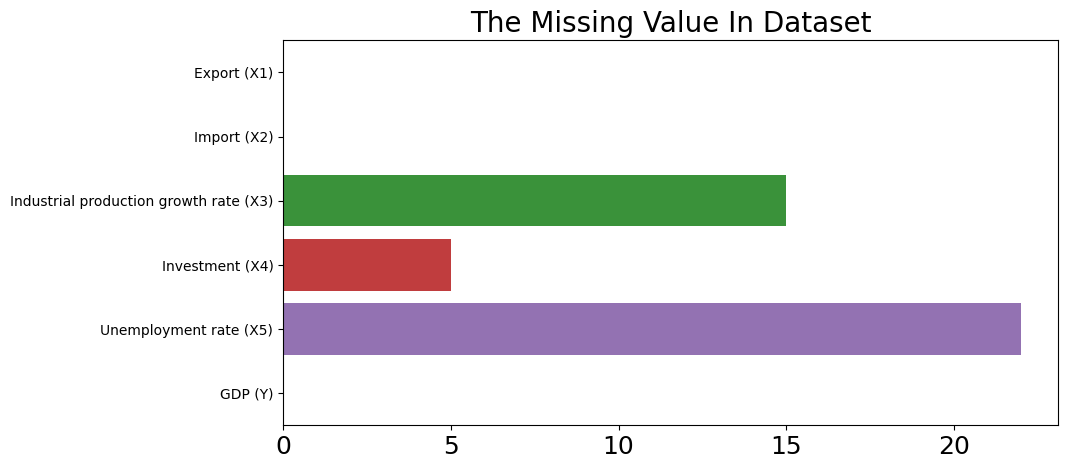

In [422]:
missing = df.isna().sum()

#plot missing value
plt.figure(figsize=(10,5))
sns.barplot(x=missing.values, y=missing.index, palette='tab10')
plt.xticks(fontsize=18)
plt.title('The Missing Value In Dataset', fontsize=20)
plt.show()

In [423]:
df = df.dropna(subset=['Industrial production growth rate (X3)', 'Investment (X4)', 'Unemployment rate (X5)'])

In [424]:
df.isna().sum()

Export (X1)                               0
Import (X2)                               0
Industrial production growth rate (X3)    0
Investment (X4)                           0
Unemployment rate (X5)                    0
GDP (Y)                                   0
dtype: int64

In [425]:
#pd.options.display.float_format = '{:.0f}'.format
pd.options.display.float_format = None

df['Export (X1)'] = df['Export (X1)'].str.slice(stop=-2).str.replace(r'[\$, ]', '', regex=True)
df['Export (X1)'] = df['Export (X1)'].astype(float)

df['Import (X2)'] = df['Import (X2)'].str.slice(stop=-2).str.replace(r'[\$, ]', '', regex=True)
df['Import (X2)'] = df['Import (X2)'].astype(float)

df['GDP (Y)'] = df['GDP (Y)'].str.slice(stop=-2).str.replace(r'[\$, ]', '', regex=True)
df['GDP (Y)'] = df['GDP (Y)'].astype(float)

df['Industrial production growth rate (X3)'] = df['Industrial production growth rate (X3)'].str.replace(' ', '')
df['Industrial production growth rate (X3)'] = df['Industrial production growth rate (X3)'].astype(float)

df['Investment (X4)'] = df['Investment (X4)'].str.replace(' ', '')                    
df['Investment (X4)'] = df['Investment (X4)'].astype(float)

df['Unemployment rate (X5)'] = df['Unemployment rate (X5)'].str.replace(' ', '')
df['Unemployment rate (X5)'] = df['Unemployment rate (X5)'].astype(float)

In [426]:
df.head()

,Export (X1),Import (X2),Industrial production growth rate (X3),Investment (X4),Unemployment rate (X5),GDP (Y)
0,5.388000e+11,4.018000e+11,6.6,24.0,4.7,3.745000e+12
1,8.933000e+11,7.167000e+11,2.2,17.6,10.6,2.362000e+12
2,1.130000e+11,3.621000e+10,2.8,17.2,25.0,3.102000e+11
3,1.625000e+11,9.291000e+10,6.4,19.1,8.3,1.408000e+12
4,1.307000e+11,1.211000e+11,4.7,20.4,3.4,2.519000e+11


In [427]:
df.describe()

,Export (X1),Import (X2),Industrial production growth rate (X3),Investment (X4),Unemployment rate (X5),GDP (Y)
count,1.160000e+02,1.160000e+02,116.000000,116.000000,116.000000,1.160000e+02
mean,7.429522e+10,7.428895e+10,6.250862,21.751724,14.087069,4.688288e+11
std,1.484871e+11,1.764759e+11,5.631117,8.246259,12.660363,1.375387e+12
min,4.930000e+07,4.152000e+08,-7.800000,8.000000,1.200000,1.270000e+09
25%,2.939000e+09,3.462000e+09,3.000000,17.175000,6.150000,2.412250e+10
50%,1.272000e+10,1.265000e+10,4.850000,19.800000,10.250000,7.353500e+10
75%,7.066000e+10,6.073750e+10,8.500000,23.925000,17.000000,3.018750e+11
max,8.933000e+11,1.476000e+12,30.000000,65.100000,70.000000,1.175000e+13


In [429]:
df.to_csv('../dataset/clean_data.csv', index=False)